In [9]:
import pandas as pd

df = pd.read_csv('tc_text_mining_mpcif.csv')
df = df.drop('Unnamed: 0',axis=1)
df['dum'] = range(len(df))

In [10]:
index = df['type']
df_neel = df[index=='Néel']
df_curie = df

In [11]:
print('curie')
print(len(df_curie))
print('neel')
print(len(df_neel))

curie
2186
neel
979


In [12]:
df_analy = df_curie.copy()
temps = df_analy.loc[:,'temperature']

/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


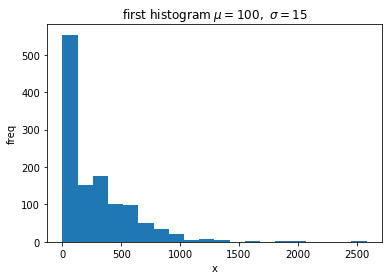

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(temps,bins=20)
ax.set_title('first histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()

In [13]:
from scipy.stats import mstats

removed_outliers = temps.between(temps.quantile(.01), temps.quantile(.99))
df_wins = df_analy[removed_outliers]
index_names = df_analy[removed_outliers].index


In [79]:
# df_wins.to_csv('tc_text_mining_mpcif_win.csv')
index = df['type']
df_neel = df_wins[index=='Néel']

/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
df_dicts = df_neel.loc[:,'parsed_form']

In [81]:
import ast 
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 
                        'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
                        'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 
                        'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 
                        'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 
                        'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']

for ele in elements:
    elemental_data[ele] = 0
for df_dict in df_dicts:
    df_dict = ast.literal_eval(df_dict)  
    for k, v in df_dict.items():
        elemental_data[k] += 1
        
for k, v in elemental_data.items():
    if v != 0:
        elemental_data[k] = np.log(v)
    else:
        elemental_data[k] = 0

In [82]:
len(df_neel)

973

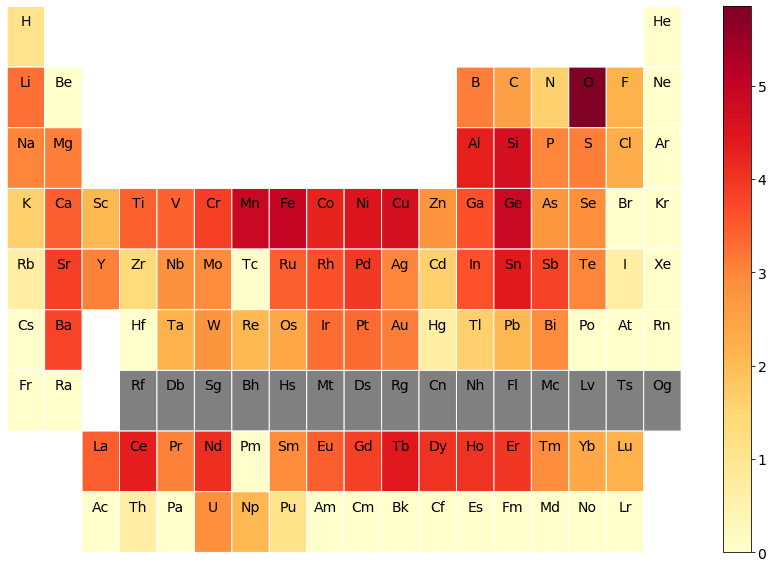

In [83]:
from pymatgen.util.plotting import periodic_table_heatmap
periodic_table_heatmap(elemental_data)
plt.savefig('per_neel.png')

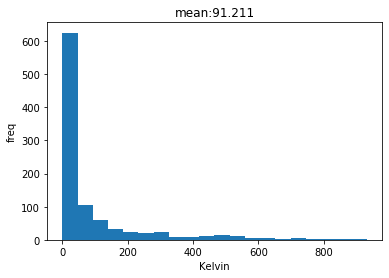

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_neel.loc[:,'temperature'].to_list(),bins=20)
mean = np.mean(df_neel.loc[:,'temperature'].to_list())
ax.set_title('mean:' + str(mean)[:6])
ax.set_xlabel('Kelvin')
ax.set_ylabel('freq')
plt.savefig('hist_neel.png')

In [11]:
df_wins.to_csv('tc_text_mining_mpcif_curie.csv')

In [13]:
flags = ['C_flags', 'N_flags', 'O_flags', 'S_flags', 'V_flags',
       'Cr_flags', 'Mn_flags', 'Fe_flags', 'Co_flags', 'Ni_flags', 'Cu_flags',
       'As_flags', 'Se_flags', 'La_flags', 'Ce_flags', 'Pr_flags', 'Nd_flags',
       'Pm_flags', 'Sm_flags', 'Eu_flags', 'Gd_flags', 'Tb_flags', 'Dy_flags',
       'Ho_flags', 'Er_flags', 'Tm_flags', 'Yb_flags', 'Lu_flags', 'Hf_flags',
       'Ta_flags']

/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new

/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10:

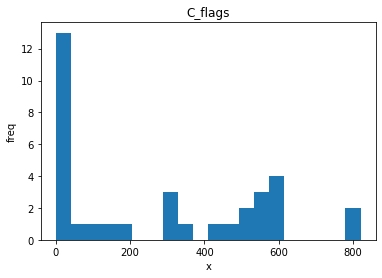

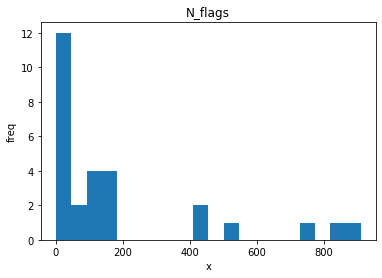

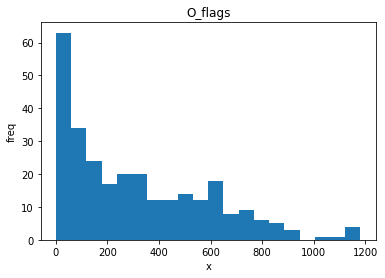

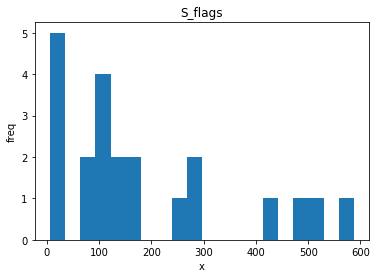

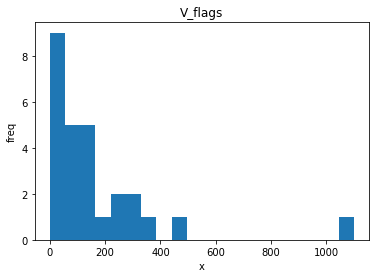

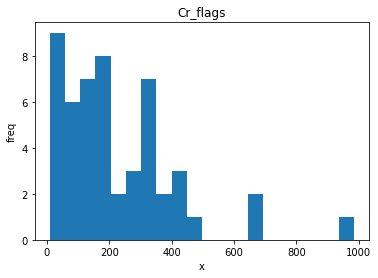

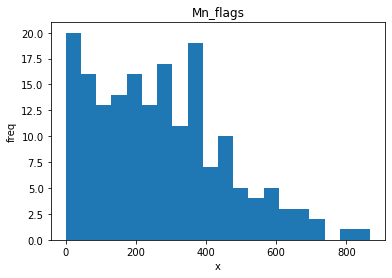

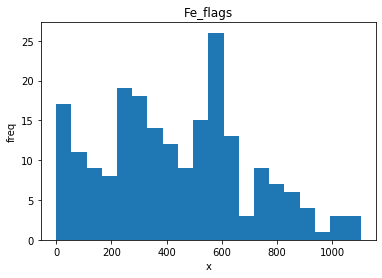

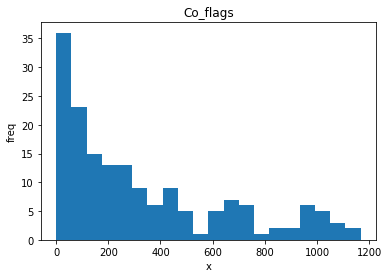

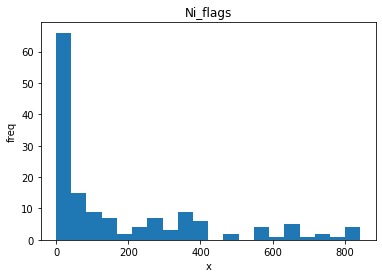

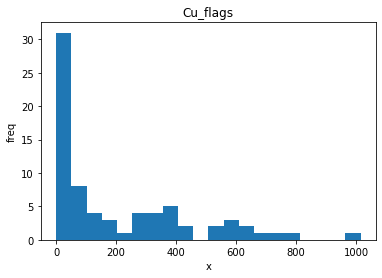

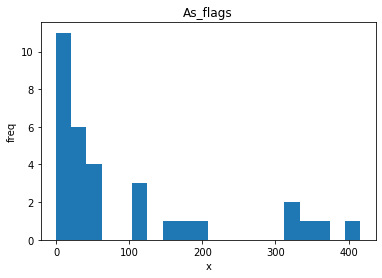

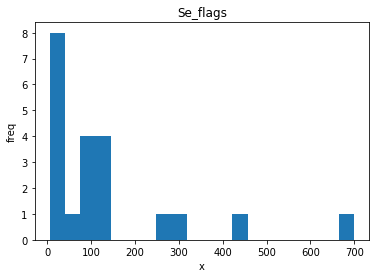

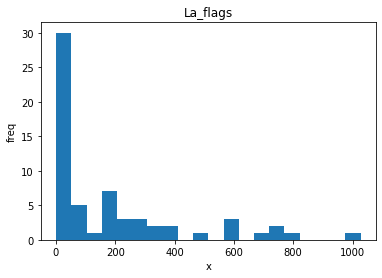

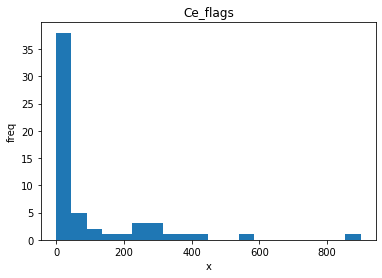

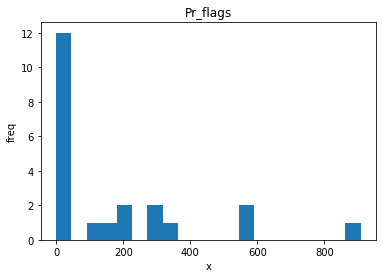

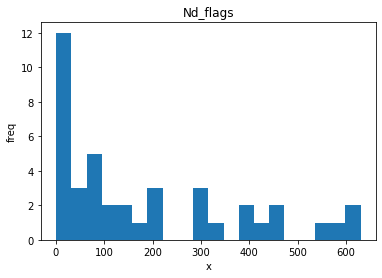

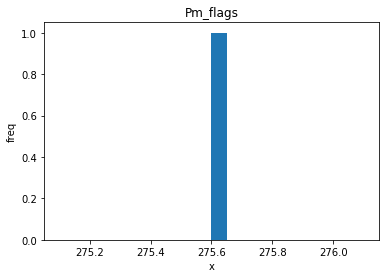

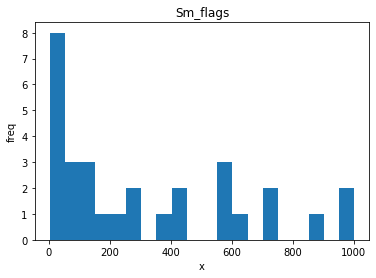

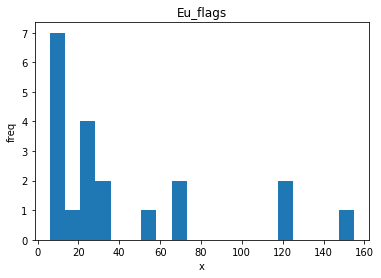

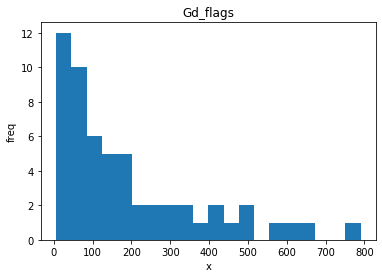

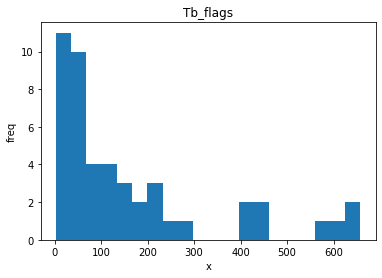

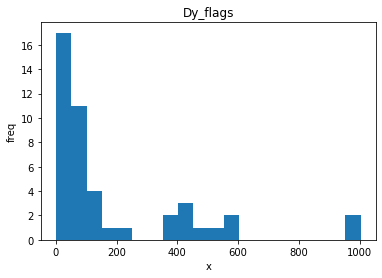

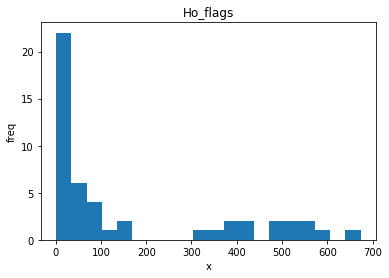

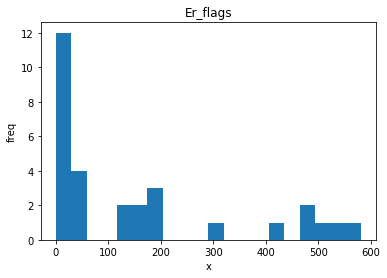

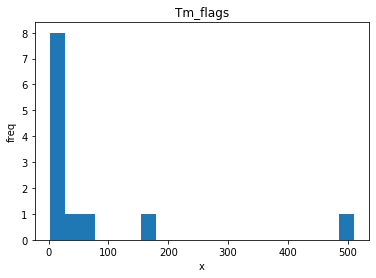

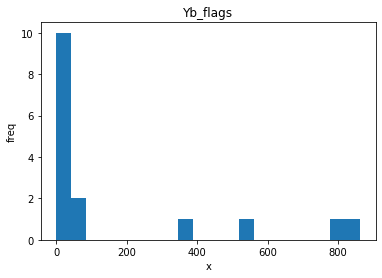

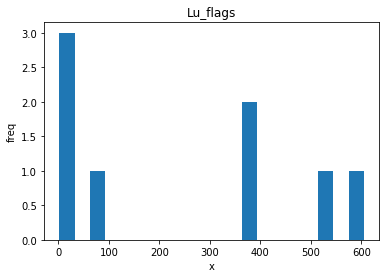

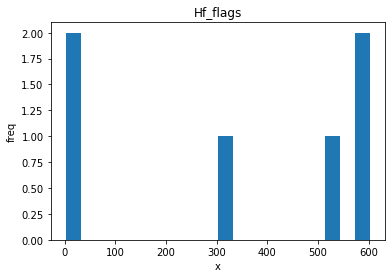

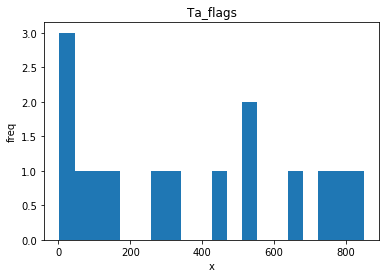

In [14]:
# filter
import numpy as np
import matplotlib.pyplot as plt

for flag in flags:
    fil_col = df_wins.copy().loc[:,flag]
    df_filtered = df_wins[fil_col==True]
    name = flag + '_tc_text_mining_mpcif_curie.csv'
    df_filtered.to_csv(name)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(df_filtered.loc[:,'temperature'].to_list(),bins=20)
    ax.set_title(flag)
    ax.set_xlabel('x')
    ax.set_ylabel('freq')
    fig.show()

In [15]:
transtions_flags = [ 'V_flags', 'Cr_flags', 'Mn_flags', 'Fe_flags', 'Co_flags', 'Ni_flags', 'Cu_flags']
heavy_flags = [ 'La_flags', 'Ce_flags', 'Pr_flags', 'Nd_flags',
       'Pm_flags', 'Sm_flags', 'Eu_flags', 'Gd_flags', 'Tb_flags', 'Dy_flags',
       'Ho_flags', 'Er_flags', 'Tm_flags', 'Yb_flags', 'Lu_flags', 'Hf_flags'
                ]

In [12]:
# rare earth free filter
import numpy as np
import matplotlib.pyplot as plt

for flag in flags:
    fil_col = df_wins.copy().loc[:,flag]
    df_filtered = df_wins[fil_col==True]
    df_filtered = df
    df_filtered.to_csv(name)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(df_filtered.loc[:,'temperature'].to_list(),bins=20)
    ax.set_title(flag)
    ax.set_xlabel('x')
    ax.set_ylabel('freq')
    fig.show()

Index(['name', 'dum', 'type', 'temperature', 'flag', 'ref_num', 'parsed_form',
       'chem_flags', 'C_flags', 'N_flags', 'O_flags', 'S_flags', 'V_flags',
       'Cr_flags', 'Mn_flags', 'Fe_flags', 'Co_flags', 'Ni_flags', 'Cu_flags',
       'As_flags', 'Se_flags', 'La_flags', 'Ce_flags', 'Pr_flags', 'Nd_flags',
       'Pm_flags', 'Sm_flags', 'Eu_flags', 'Gd_flags', 'Tb_flags', 'Dy_flags',
       'Ho_flags', 'Er_flags', 'Tm_flags', 'Yb_flags', 'Lu_flags', 'Hf_flags',
       'Ta_flags', 'mp_flags'],
      dtype='object')

In [39]:
fil_col_1 = df_wins.copy().loc[:,transtions_flags[0]]
fil_col_2 = df_wins.copy().loc[:,transtions_flags[1]]
fil_col_3 = df_wins.copy().loc[:,transtions_flags[2]]
fil_col_4 = df_wins.copy().loc[:,transtions_flags[3]]
fil_col_5 = df_wins.copy().loc[:,transtions_flags[4]]
fil_col_6 = df_wins.copy().loc[:,transtions_flags[5]]
fil_col_7 = df_wins.copy().loc[:,transtions_flags[6]]

fil_col_1_h = df_wins.copy().loc[:,heavy_flags[0]]
fil_col_2_h = df_wins.copy().loc[:,heavy_flags[1]]
fil_col_3_h = df_wins.copy().loc[:,heavy_flags[2]]
fil_col_4_h = df_wins.copy().loc[:,heavy_flags[3]]
fil_col_5_h = df_wins.copy().loc[:,heavy_flags[4]]
fil_col_6_h = df_wins.copy().loc[:,heavy_flags[5]]
fil_col_7_h = df_wins.copy().loc[:,heavy_flags[6]]
fil_col_8_h = df_wins.copy().loc[:,heavy_flags[7]]
fil_col_9_h = df_wins.copy().loc[:,heavy_flags[8]]
fil_col_10_h = df_wins.copy().loc[:,heavy_flags[9]]
fil_col_11_h = df_wins.copy().loc[:,heavy_flags[10]]
fil_col_12_h = df_wins.copy().loc[:,heavy_flags[11]]
fil_col_13_h = df_wins.copy().loc[:,heavy_flags[12]]
fil_col_14_h = df_wins.copy().loc[:,heavy_flags[13]]
fil_col_15_h = df_wins.copy().loc[:,heavy_flags[14]]
fil_col_16_h = df_wins.copy().loc[:,heavy_flags[15]]


df_filtered_t = df_wins[(fil_col_1==True) | (fil_col_2==True) | (fil_col_3==True) | (fil_col_4==True) | (fil_col_5==True) | (fil_col_6==True) | (fil_col_7==True)]
df_filtered = df_filtered_t[(fil_col_1_h==False) & (fil_col_2_h==False) & (fil_col_3_h==False) & (fil_col_4_h==False) & (fil_col_5_h==False) & (fil_col_6_h==False) & (fil_col_7_h==False) & (fil_col_8_h==False) & (fil_col_9_h==False) & (fil_col_10_h==False) & (fil_col_11_h==False) & (fil_col_12_h==False) & (fil_col_13_h==False) & (fil_col_14_h==False) & (fil_col_15_h==False)]

/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [42]:
print(len(df_filtered))
df_filtered.to_csv('rare_earth_free_tc_text_mining_mpcif_curie.csv')

106


/Users/dragonlook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


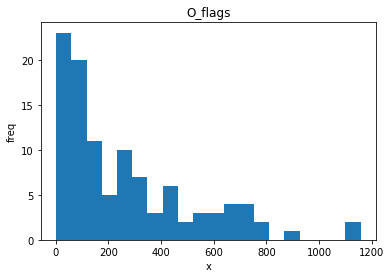

In [43]:
# rare earth free oxide filter

fil_col = df_filtered.copy().loc[:,'O_flags']
df_filtered = df_filtered[fil_col==True]
name = 'O_flags' + '_rare_earth_free_tc_text_mining_mpcif_curie.csv'
df_filtered.to_csv(name)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_filtered.loc[:,'temperature'].to_list(),bins=20)
ax.set_title('O_flags')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()

In [45]:
df_filtered.to_csv('oxide_rare_earth_free_tc_text_mining_mpcif_curie.csv')

In [60]:
fi_group = [i for i in df_wins.loc[:,'dum'].to_list() if i not in df_filtered.loc[:,'dum'].to_list()]
df_fi_group = df_wins.loc[fi_group,:]

In [62]:
df_fi_group.to_csv('fi_oxide_rare_earth_free_tc_text_mining_mpcif_curie.csv')